In [1]:
'''
plot the froc curve
'''

'\nplot the froc curve\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calc_froc

In [3]:
print('Loading...')
manifest_aneurysm = pd.read_csv('aneurysms.csv')
manifest_patient = pd.read_csv('patients.csv')

print('Processing model results...')
manifest_test = calc_froc.preprocess_result_manifest(manifest_aneurysm, ['test'])
froc_test = calc_froc.get_froc_manifest(manifest_test)

manifest_patient_test = manifest_patient[manifest_patient['Dataset'].isin(['test'])]

legends = ['Model']

Loading...
Processing model results...


Number of FROCS = 1
Plotting FROC 0


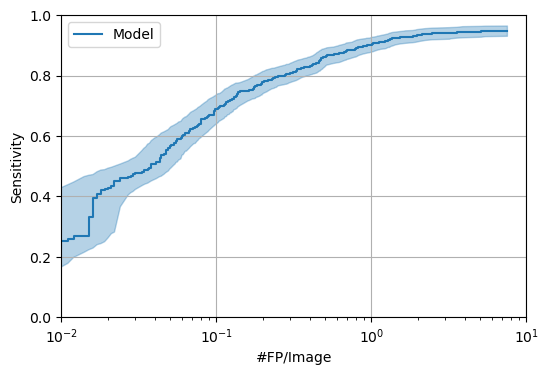

Averaged TPR
Model: 0.8720066061106523 [0.849717545928631, 0.8934980242577245]


In [4]:
# testing froc: main results
fig, ax, frocs = calc_froc.calc_frocs(
    [froc_test], manifest_patient_test['MRN'].values, legends=legends
)
# ax.set_title('Test')
plt.show()

for i in range(len(frocs)):
    avg_tpr = frocs[i]['average_tpr']
    avg_tpr_ci = frocs[i]['average_tpr_ci']
    print('Averaged TPR')
    print('{0}: {1} [{2}, {3}]'.format(
        legends[i], avg_tpr, avg_tpr_ci[0], avg_tpr_ci[1]
    ))

In [5]:
def filter_froc_by_size(df_froc, th_low, th_high):
    '''
    keep only the label/fn  whose size > th_low and <= th_high
    '''
    df_label = df_froc[df_froc['Tag'].isin(['annotation'])]
    df_label = df_label[(df_label['AneurysmSize'] > th_low) & (df_label['AneurysmSize'] <= th_high)]
    df_fp = df_froc[~df_froc['Tag'].isin(['annotation'])]

    return pd.concat([df_label, df_fp])

0 < size <= 5: 106 (15.32%)
5 < size <= 10: 277 (40.03%)
10 < size <= inf: 309 (44.65%)


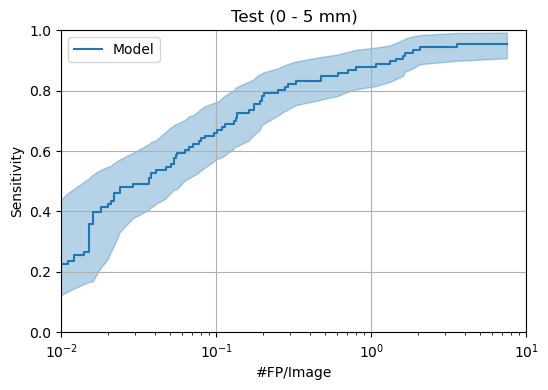

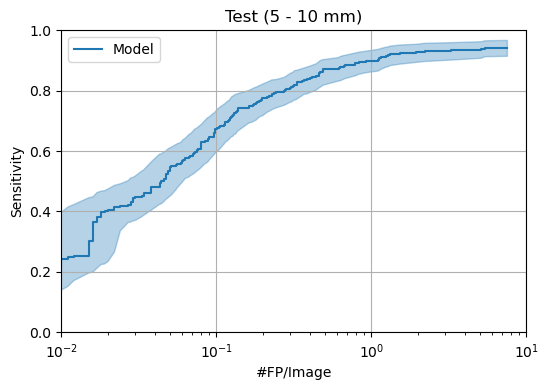

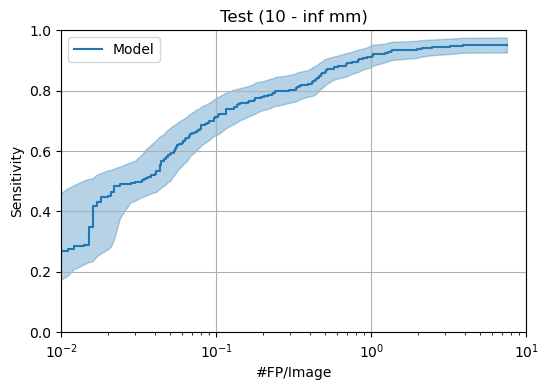

In [6]:
# froc by size
# histogram
df_label = manifest_test[manifest_test['Tag'].isin(['annotation'])]
th_size = [0, 5, 10, np.inf]
for i in range(1, len(th_size)):
    df = df_label[(df_label['AneurysmSize'] > th_size[i - 1]) & (df_label['AneurysmSize'] <= th_size[i])]
    print('{0} < size <= {1}: {2} ({3:.2f}%)'.format(
        th_size[i - 1], th_size[i], len(df), len(df) / len(df_label) * 100
    ))

# plot the frocs for each of the size group
for i in range(1, len(th_size)):
    df_dpn = filter_froc_by_size(froc_test, th_size[i - 1], th_size[i])

    fig, ax, frocs = calc_froc.calc_frocs(
        [df_dpn], manifest_patient_test['MRN'].values,
        legends=legends, verbose=0
    )
    ax.set_title('Test ({0} - {1} mm)'.format(th_size[i - 1], th_size[i]))
    plt.show()

In [7]:
def filter_froc_by_position(df_froc, position):
    '''
    keep only the label/fn whose position is in the given position
    '''
    if not isinstance(position, list):
        position = [position]

    df_label = df_froc[df_froc['Tag'].isin(['annotation'])]
    df_label = df_label[df_label['Position'].isin(position)]
    df_fp = df_froc[~df_froc['Tag'].isin(['annotation'])]

    return pd.concat([df_label, df_fp])

ICA 227
PCOM 232
MCA 233


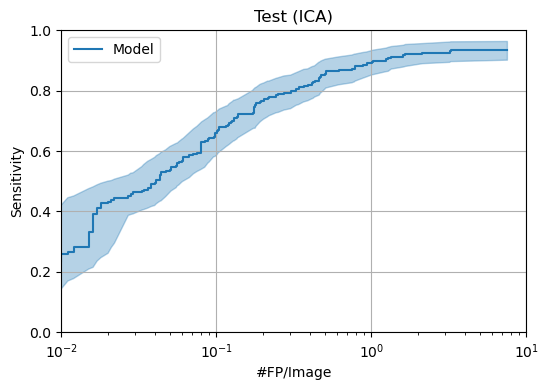

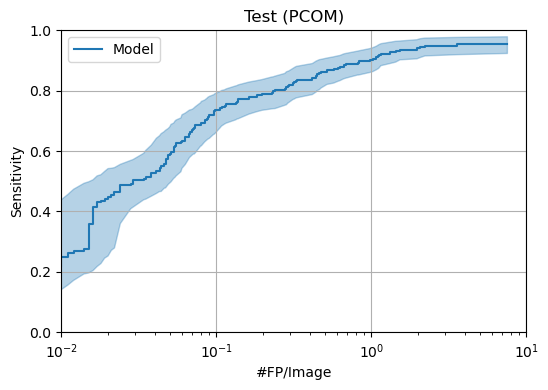

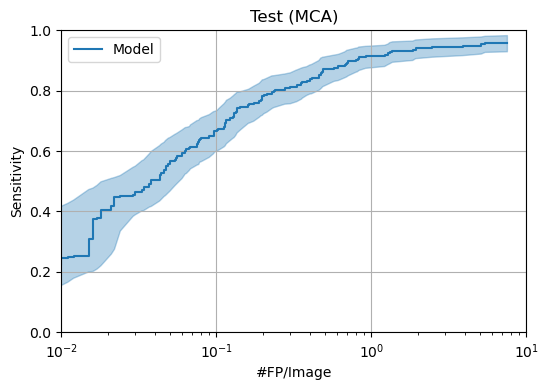

In [8]:
# froc by position
for pos in pd.unique(df_label['Position']):
    print(pos, len(df_label[df_label['Position'] == pos]))

for pos in pd.unique(df_label['Position']):
    df_dpn = filter_froc_by_position(froc_test, pos)

    fig, ax, frocs = calc_froc.calc_frocs(
        [df_dpn], manifest_patient_test['MRN'].values,
        legends=legends, verbose=0
    )
    ax.set_title('Test ({0})'.format(pos))
    plt.show()

Site2 number of patients = 537
Site1 number of patients = 463


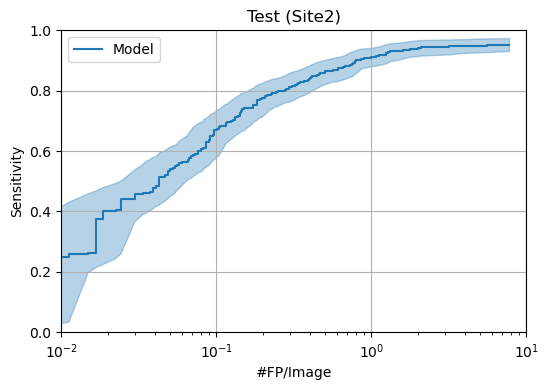

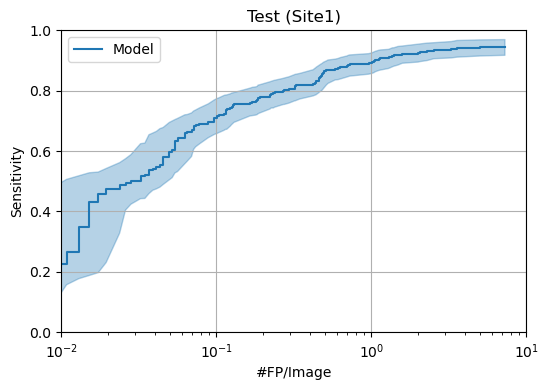

In [9]:
# by site
for site in pd.unique(manifest_patient_test['Site']):
    print(site, 'number of patients = {0}'.format(len(manifest_patient_test[manifest_patient_test['Site'] == site])))

for site in pd.unique(manifest_patient_test['Site']):
    df = manifest_patient_test[manifest_patient_test['Site'] == site]

    df_dpn = froc_test[froc_test['MRN'].isin(df['MRN'])]

    fig, ax, frocs = calc_froc.calc_frocs(
        [df_dpn], df['MRN'].values,
        legends=legends, verbose=0
    )
    ax.set_title('Test ({0})'.format(site))
    plt.show()